<a href="https://colab.research.google.com/github/aimetz/Resume/blob/main/Final_Project%2C_Predictive_Text%2C_Data301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Data Collection and Cleaning***

In [ ]:
import pandas as pd
import requests
from collections import Counter
from bs4 import BeautifulSoup
import time

response = requests.get("https://www.gutenberg.org/browse/scores/top#books-last1")#a list of 100 most popular books
soup = BeautifulSoup(response.content, "html.parser")
ol = soup.find("ol")
book_nums = {}
for a in ol.find_all("a"):
    book_nums[str(a).split()[1].split('"')[1].split("/")[2]] = a.text #key-book number     value-Book name
"number of books: "+str(len(book_nums)), list(book_nums.values())[:10]#Only display 10 book names

('number of books: 100',
 ['Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (4678)',
  'Pride and Prejudice by Jane Austen (2474)',
  'The Great Gatsby by F. Scott  Fitzgerald (1387)',
  'Et dukkehjem. English by Henrik Ibsen (1275)',
  'A Tale of Two Cities by Charles Dickens (1179)',
  "Alice's Adventures in Wonderland by Lewis Carroll (1150)",
  'The Importance of Being Earnest: A Trivial Comedy for Serious People by Oscar Wilde (1050)',
  'The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson (964)',
  'A Modest Proposal by Jonathan Swift (963)',
  'The Picture of Dorian Gray by Oscar Wilde (959)'])

In [ ]:
### Reads all books into a series
### Series contains-
### index: Book num     Value: full cleaned text
books = pd.Series(dtype="object")
whitelist = set('abcdefghijklmnopqrstuvwxyz ')
for i in book_nums.keys():
    infile = requests.get("https://www.gutenberg.org/files/%s/%s-0.txt"%(i, i))#opens url for each book num
    if not infile.text[:15] =="<!DOCTYPE html>": # Checks to make sure url is valid
        infile.encoding = "UTF-8" # Correct enconding
        book = infile.text.replace("\n", " ").replace("\r", " ").lower() #removes type-ins, makes lowercase 
        book = "".join(filter(whitelist.__contains__, book)).split() # Removes all charicters not in whitelist
        books.loc[book_nums[i]] = book[300:len(book)-3000] # Cuts off header and copywright info at top and bottom
    time.sleep(.25)
books

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (4678)    [of, those, icy, climes, inspirited, by, this,...
Pride and Prejudice by Jane Austen (2474)                                        [is, let, at, last, mr, bennet, replied, that,...
The Great Gatsby by F. Scott  Fitzgerald (1387)                                  [of, not, a, few, veteran, bores, the, abnorma...
Et dukkehjem. English by Henrik Ibsen (1275)                                     [burns, in, the, stove, it, is, winter, a, bel...
A Tale of Two Cities by Charles Dickens (1179)                                   [the, loadstone, rock, book, the, thirdthe, tr...
                                                                                                       ...                        
The Life and Adventures of Robinson Crusoe by Daniel Defoe (218)                 [merchandise, and, leaving, off, his, trade, l...
Sense and Sensibility by Jane Austen (214)                                       [o

All of the following commented out code works but I opted to not use it because the amount of data it produces is insignificant to the book data

In [ ]:
#books.drop("La Maternelle by Léon Frapié (180)", inplace = True) # That book is in french, only need english
#books

In [ ]:
# wiki_dir = "https://en.wikipedia.org/wiki/Wikipedia:Most-referenced_articles"
# soup = BeautifulSoup(requests.get(wiki_dir).content, "html.parser")
# tab = soup.find_all("table")[1]
# wiki_articles = set()
# for a in tab.find_all("a"):
#     a = str(a).split()[1]
#     wiki_articles.add(a[6:len(a)-1])
#     time.sleep(.25)
# wiki_articles.remove('"mw-redirect')
# "Number of wikipedia articles: " +str(len(wiki_articles)), list(wiki_articles)[10:15]

In [ ]:
# for article in wiki_articles:
#     soup = BeautifulSoup(requests.get("https://en.wikipedia.org"+article).content, "html.parser")
#     txts = soup.find_all("p")
#     cleaned = ""
#     for txt in txts:
#         cleaned += ''.join(filter(whitelist.__contains__, txt.text.lower()))
#     time.sleep(.25)
# cleaned, len(cleaned.split())

In [ ]:
# books.loc["wiki"] = cleaned
# books














******




***Data Exploration***

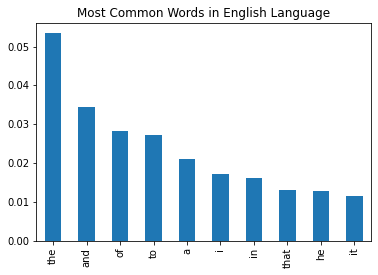

In [ ]:
series = pd.Series(books.apply(Counter).sum())
(series/series.sum()).sort_values(ascending=False).iloc[:10].plot.bar(title="Most Common Words in English Language")

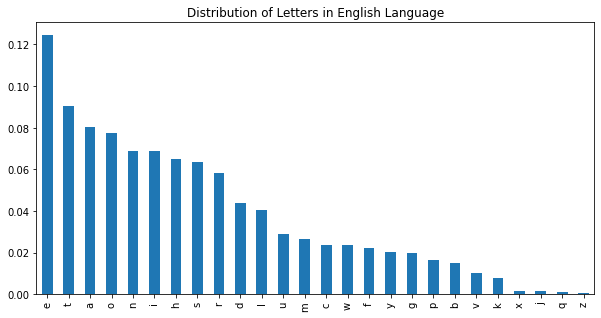

In [ ]:
count = Counter()
for i in range(len(books)):
    count += Counter("".join(books.iloc[i]))
series = pd.Series(count)
(series/series.sum()).sort_values(ascending=False).plot.bar(figsize=(10, 5), title="Distribution of Letters in English Language")

In [ ]:

### This block is the majority of the machine learning model. It just lives up here cause
### I used it for visualizations as well



### Breaks every book into bigrams thru 5grams inclusive and counts
### Series contains-
### Index: previous n words     value: count of following words, unsorted
grams = {}
for n in range(1, 5): #N grams grouped by first n words, N = n+1
    print("building " +str(n+1)+"-grams")
    for book in books:# Iterate through all books
        for i in range(len(book)-n):# Iterate through all words
            g = " ".join(book[i:i+n])
            if g in grams: # if first N-1 words already found, append next word to list
              grams[g].append(book[i+n])
            else: # Start a new list with following word
              grams[g]= [book[i+n]]
print("counting n-grams")
grams = pd.Series(grams).apply(Counter)#Find counts for words following all grams
grams #still not sorted

building 2-grams
building 3-grams
building 4-grams
building 5-grams
counting n-grams


of                             {'those': 2056, 'promise': 29, 'frost': 10, 'b...
those                          {'icy': 3, 'undiscovered': 1, 'countries': 12,...
icy                            {'climes': 1, 'wall': 1, 'and': 2, 'black': 1,...
climes                         {'inspirited': 1, 'of': 1, 'whiteness': 1, 'th...
inspirited                                      {'by': 3, 'me': 1, 'chapter': 1}
                                                     ...                        
for the abandonment of                                                {'the': 1}
abandonment of the gigantic                                        {'blocks': 1}
of the gigantic blocks                                                 {'of': 1}
the gigantic blocks of                                              {'stone': 1}
gigantic blocks of stone                                            {'which': 1}
Length: 17764391, dtype: object

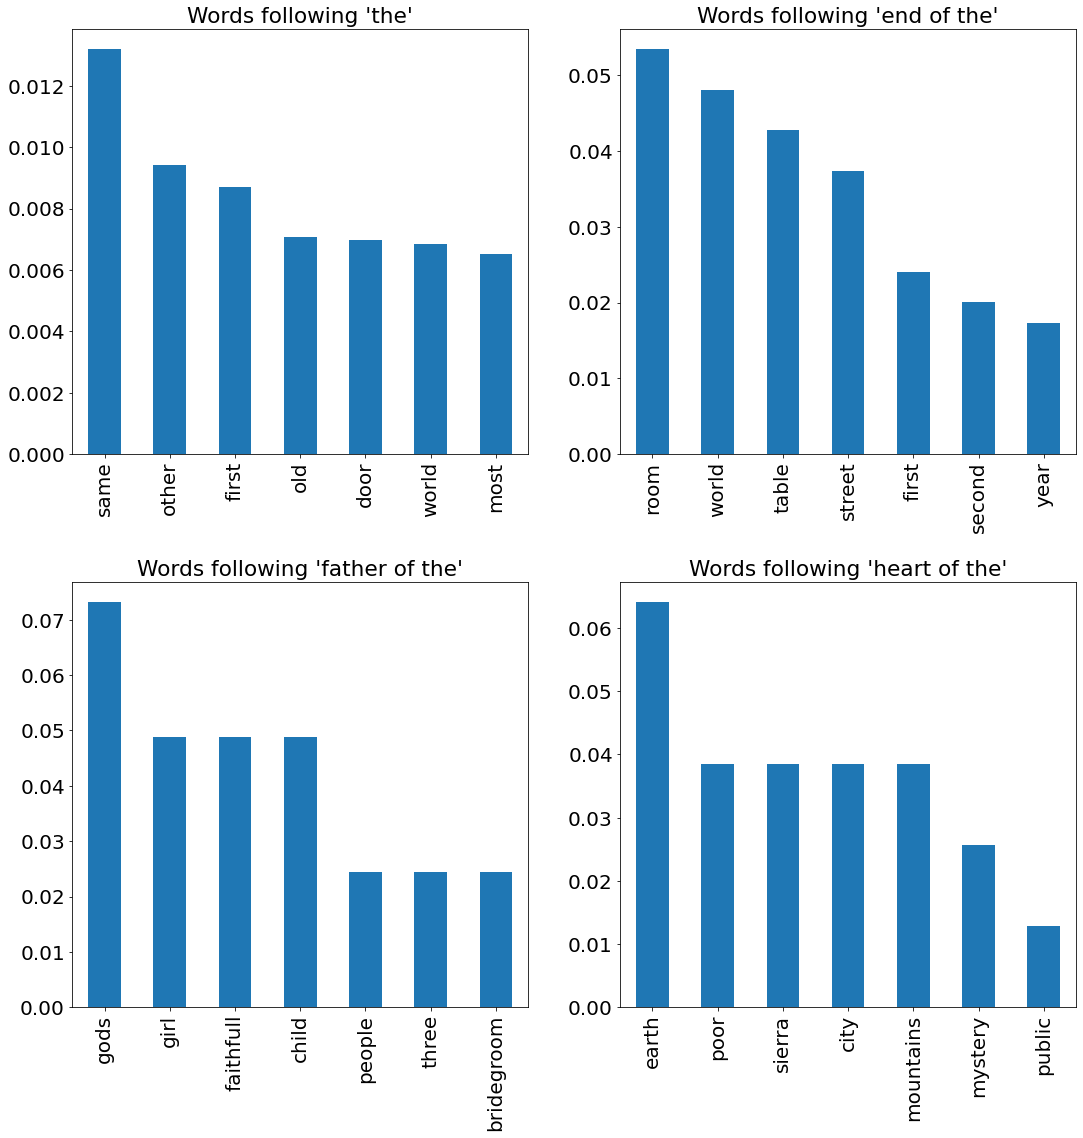

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 18))
plt.rcParams.update({'font.size': 18}) # must set in top
plt.subplots_adjust(hspace=.3)
sp = [221, 222, 223, 224]
st = ["the", "end of the", "father of the", "heart of the"]
m=7
for p, s in zip(sp, st):
    sers = pd.Series(grams[s]).sort_values(ascending=False)
    (sers/sers.sum()).iloc[:m].plot.bar(title="Words following '"+s+"'", ax=fig.add_subplot(p), fontsize=20)


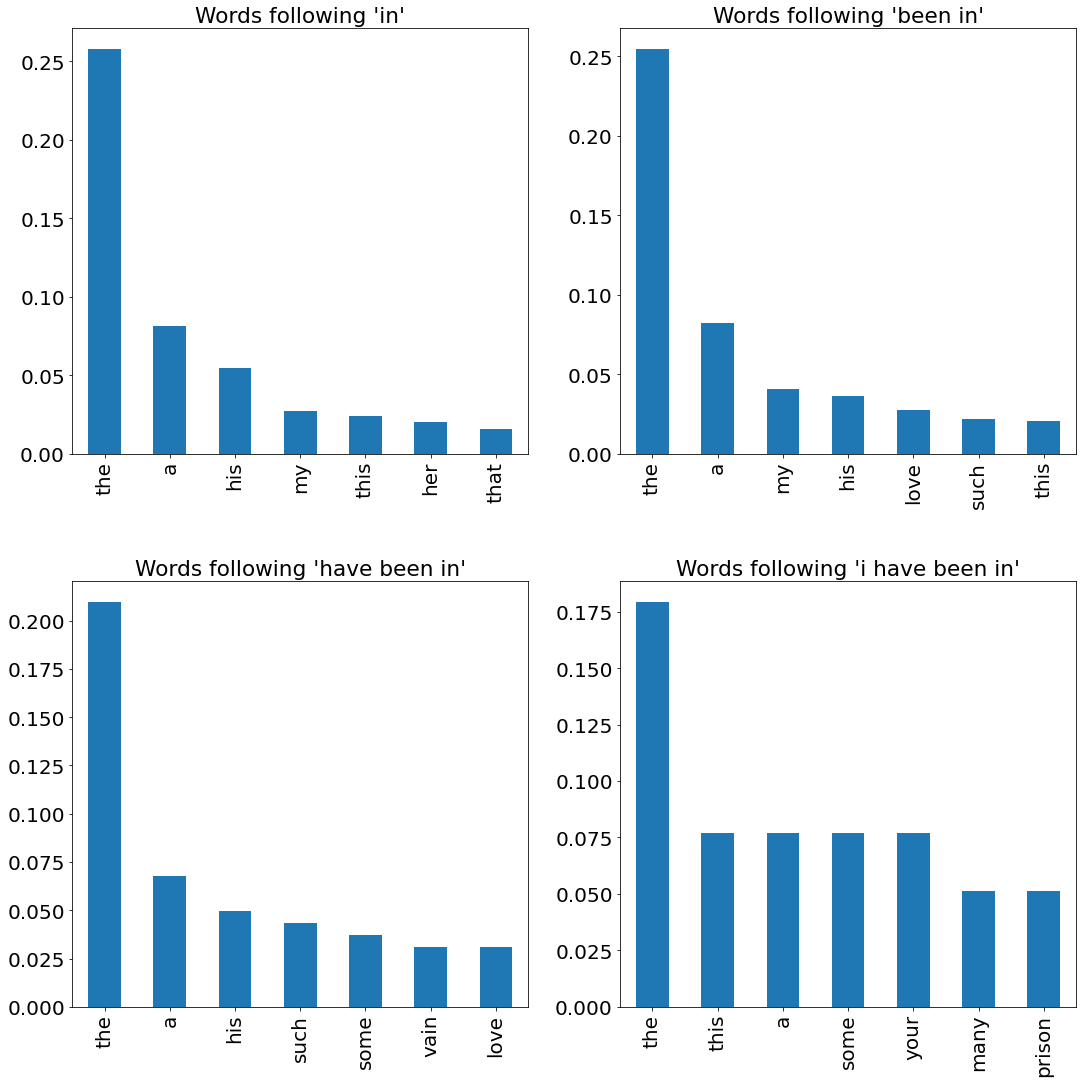

In [ ]:
fig = plt.figure(figsize=(18, 18))
plt.rcParams.update({'font.size': 18}) # must set in top
st = ["in", "been in", "have been in", "i have been in"]
plt.subplots_adjust(hspace=.3)
sp = [221, 222, 223, 224]
for p, s in zip(sp, st):
    sers = pd.Series(grams[s]).sort_values(ascending=False)
    (sers/sers.sum()).iloc[:7].plot.bar(title="Words following '"+s+"'", ax=fig.add_subplot(p), fontsize=20)







***Machine Learning***

In [ ]:
###Predicts next N words
### String, Int(optional) --> String
### input can be 1 - 3 words long. If longer only
### Considers previous 3 words
def predict_text(input):
    prev = input.lower().split()
    prev.reverse()
    result = set()
    for k in range(4):
        j = 4-k
        string = prev[:min(len(prev), j+1)]
        string.reverse()
        key = " ".join(string)
        if key in grams:
            s = pd.Series(grams[key]).sort_values(ascending=False).index.tolist()
            z = 0
            word = s[z]
            while z < len(s) and z<3:
                if len(result) < 3:
                    result.add(s[z])
                z += 1

    return result

In [ ]:
predict_text("i want")

{'a', 'to', 'you'}

In [ ]:
predict_text("we are in good")

{'health', 'repair', 'time'}

In [ ]:
predict_text("i want to sail from")

{'london', 'seville', 'zealand'}

In [ ]:
predict_text("do you need")

{'money', 'not', 'to'}

In [ ]:
predict_text("sail the")

{'sea', 'seas', 'wind'}

In [ ]:
predict_text("lets get to")

{'know', 'the', 'work'}

In [ ]:
predict_text("can i have some")

{'business', 'money', 'of'}

In [ ]:
predict_text("would you like a")

{'cup', 'lift', 'priest'}

In [ ]:
predict_text("i want to go to a")

{'certain', 'court', 'good'}

In [ ]:
###Predicts next N words
### String, Int(optional) --> String
### input can be 1 - 3 words long. If longer only
### Considers previous 3 words
def predict_text2(input, num_words=20):
    prev = input.lower().split()
    prev.reverse()
    result = ""
    for i in range(num_words):
        val = 0
        for j in range(3):
            string = prev[:min(len(prev), j+1)]
            string.reverse()
            key = " ".join(string)
            if key in grams:
                s = pd.Series(grams[key]).sort_values(ascending=False).index.tolist()
                z = 0
                word = s[z]
                while word in prev and z < len(s) and z<5:
                    word = s[z]
                    z += 1
        prev.insert(0, word)
        result += prev[0] + " "
    return result

In [ ]:
a = open("new.txt", "w") #Creates a text document
a.write("test")
a.close()

In [ ]:
#Can make livetime predictions while editing new.txt
#Must hit ctrl-s to save to update predictions
import time
from IPython.display import clear_output

for i in range(1):
    a = open("new.txt", "r")
    for line in a:#The stupidest way to get to the last line
        pass
    a.close()
    preds = predict_text(line)
    clear_output()
    print(preds)
    time.sleep(1)


{'the', 'and', 'of'}
